[tensor([ 7.,  5., 16., 12.]), tensor([120.,  40., 210., 180.])]
[tensor([20.]), tensor([240.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([15.1285], requires_grad=True),b=Parameter containing:
tensor([1.4746], requires_grad=True), and loss =3868.11767578125
After 10 epochs, The parameters are w=Parameter containing:
tensor([13.5749], requires_grad=True),b=Parameter containing:
tensor([1.8608], requires_grad=True), and loss =2180.764404296875
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.5338], requires_grad=True),b=Parameter containing:
tensor([2.3466], requires_grad=True), and loss =2143.605224609375
After 30 epochs, The parameters are w=Parameter containing:
tensor([12.9991], requires_grad=True),b=Parameter containing:
tensor([2.7992], requires_grad=True), and loss =4.18950891494751
After 40 epochs, The parameters are w=Parameter containing:
tensor([13.6317], requires_grad=True),b=Parameter containing:
tensor([3.0839], requires_grad=T

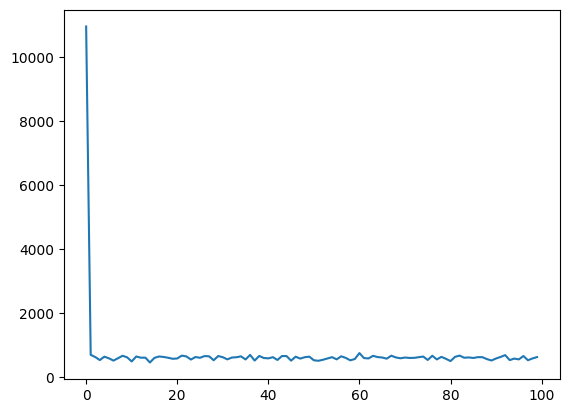

In [2]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)